In [50]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.feature_extraction import DictVectorizer
from sklearn.preprocessing import LabelEncoder
import numpy as np

In [51]:
#Code for creating data frame of testing data
data = pd.read_csv('requests.csv')
data.columns = ['timestamp', 'userID', 'sessionID', 'expiring', 'URL']
data.head()

,timestamp,userID,sessionID,expiring,URL
0,1676373343936,user-1003,c85cbd00-d2fc-4cda-9f5c-66616847d851,1676373495816,/chat/send/442
1,1676373344344,user-1005,a0038f81-b46a-4f26-a7ea-2791d53404fb,1676373476316,/profile/407
2,1676373344456,user-1003,c85cbd00-d2fc-4cda-9f5c-66616847d851,1676373495816,/chat/send/969
3,1676373344912,user-65,fd48a9f9-67f4-4185-9bcc-a76b7139401c,1676373604676,/searchUsers?page=0
4,1676373345020,user-1005,a0038f81-b46a-4f26-a7ea-2791d53404fb,1676373476316,/profile/148


In [55]:
users = list(data['userID'])
allUsers = data.set_index(['userID']).rename_axis(None)
allUsers = allUsers.drop(columns=['timestamp', 'sessionID', 'expiring'])
allUsers


,URL
user-1003,/chat/send/442
user-1005,/profile/407
user-1003,/chat/send/969
user-65,/searchUsers?page=0
user-1005,/profile/148
...,...
user-629,/profile/572
user-629,/conversation/572
user-629,/conversation/572/markAsRead
user-1005,/profile/995


In [56]:
df = allUsers.groupby( level=0).agg(','.join)
df

,URL
user-10,"/login, /searchUsers?page=0, /profile/372, /c..."
user-100,"/login, /searchUsers?page=0, /profile/716, /p..."
user-1000,"/login, /searchUsers?page=0, /profile/626, /c..."
user-1001,"/login, /searchUsers?page=0, /profile/117, /p..."
user-1002,"/login, /searchUsers?page=0, /profile/162, /c..."
...,...
user-995,"/login, /searchUsers?page=0, /profile/337, /p..."
user-996,"/login, /searchUsers?page=0, /profile/642, /p..."
user-997,"/login, /searchUsers?page=0, /profile/760, /c..."
user-998,"/login, /searchUsers?page=0, /profile/944, /p..."


In [84]:
#This doesnt really do anything, trying to turn URL into strings
df['URL'] = df['URL'].astype(str)


#pandas stores strings as object, so str.split should work
df['URL'].dtype

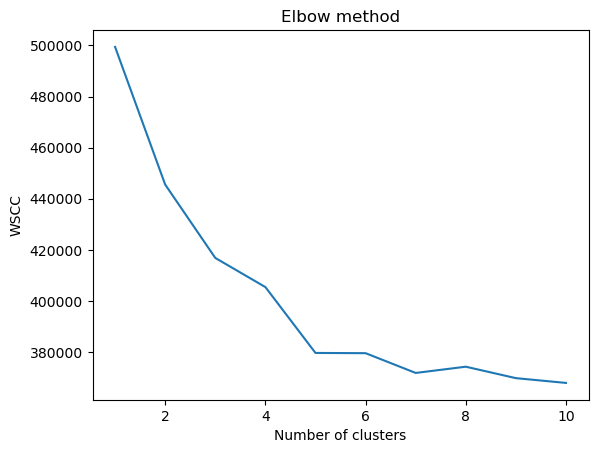

In [88]:
#elbow method to find appropriate nbr of clusters
x = encoded
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11), wcss)
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WSCC')
plt.show()